<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/METODOS_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M É T O D O S - D E - M O N T E C A R L O

Los métodos de Monte Carlo son técnicas estadísticas que permiten aproximar el valor de una integral compleja utilizando simulaciones aleatorias. Aquí se describen tres métodos: media muestral, acierto y error, y muestreo de importancia.

Aproximaremos la integral
$$ \int_0^1 cos( \frac{\pi}{2}x) dx $$

# MEDIA MUESTRAL

Este es el método más básico de Monte Carlo. La idea es estimar el valor de la integral utilizando el promedio de muestras aleatorias obtenidas de la función.

Supongamos que queremos aproximar la integral de una función $f(x)$ en el intervalo $[a, b]$:

$$ I = \int_a^b f(x) \, dx $$

El procedimiento es el siguiente:
  1.  Generamos $ N $ muestras aleatorias $ x_1, x_2, ..., x_N$ distribuidas uniformemente en el intervalo $[a, b] $.
  2. Calculamos el promedio de los valores de la función en esas muestras:
    $$ I \approx \frac{b-a}{N} \sum_{i=1}^{N} f(x_i)$$

Aquí, el factor $\frac{b-a}{N}$ ajusta el valor del promedio para el intervalo de integración.

A continuación realizamos el método metiante simulación, calcularemos la media, varianza y tiempo de ejecución para finalmente concluir que metodo es el mejor de los tres que trabajaremos.


In [246]:
# Importemos librerias necesarias
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import time

In [247]:
start_time1 = time.time() # Definimos nuestra variable que almacenara el tiempo de ejecución
def g_met_med(x):       # Definimos nuestra función g(x)
  g1=np.cos(np.pi*x/2)
  return g1

In [248]:
def exp_met_med(n,a,b):
  u=np.random.uniform(0, 1, n)      #Generamos n variables ~ U(0,1)
  x=a+u*(b-a)
  g1=g_met_med(x)
  I1=(b-a)/n*np.sum(g1)               #Calculamos la aproximación de la integral
  return I1

In [249]:
def histograma1(aprox):                                  #Esta función imprime la estimación y el histograma
  plt.hist(aprox, bins=25, color='lightsalmon', alpha=0.3)
  plt.axvline(np.mean(aprox),label='Media')
  plt.xlabel('Valor de la integral')
  plt.ylabel('Frecuencia')
  plt.legend()
  print(f"Estimación de la Media: {np.mean(aprox):.4f}")
  return

Estimación de la Media: 0.6361


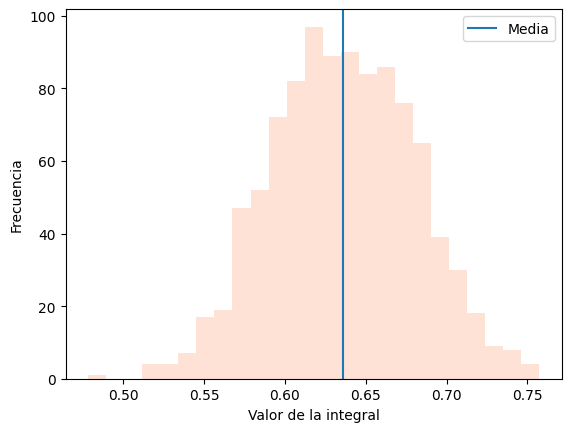

In [250]:
#Parametros
m=1000        #Número de iteraciones
n=50           #Tamaño de la experimentos
a=0             #Límite inferior de la integral
b=1             #Límite superior de la integral
aprox1=[]
for i in range(m):
  I1 = exp_met_med(n,a,b)
  aprox1.append(I1)
histograma1(aprox1)

In [251]:
mu1 = np.mean(aprox1) # Calculamos la media
print(f"Valor de la media: {mu1:.4f}")
sigma1 = np.var(aprox1) # Calculamos la varianza
print(f"Valor de la varianza: {sigma1:.4f}")

Valor de la media: 0.6361
Valor de la varianza: 0.0019


In [252]:
end_time1 = time.time()
tiempo1 = end_time1 - start_time1 # Calculamos el tiempo de ejecución
print(f"Tiempo de ejecución: {tiempo1:.4f} segundos")

Tiempo de ejecución: 7.5508 segundos


# ACIERTO Y ERROR

Este método también conocido como rejilla de puntos o método de aceptación-rechazo se basa en estimar la proporción de puntos que caen debajo de la curva de la función.

Procedimiento:
 1. Supongamos que queremos aproximar la integral $$ \int_a^b f(x) \, dx $$ y que sabemos que la función $f(x)$ está acotada por un valor $M$, es decir, $ 0 \leq f(x) \leq M$ en el intervalo $ [a, b] $.

 2. Generamos $N$ puntos aleatorios dentro de un rectángulo de base $ b - a $ y altura $ M $. Es decir, los puntos $ (x_i, y_i) $ son generados aleatoriamente con $ x_i \in [a, b] $ y $ y_i \in [0, M] $.

 3. Contamos cuántos de esos puntos caen debajo de la curva de la función \( f(x) \), es decir, cuántos puntos $(x_i, y_i)$ cumplen con $ y_i \leq f(x_i)$

 $$I \approx \frac{\text{Número de puntos bajo la curva}}{N} \times (b - a) \times M$$


Este método es más eficiente para funciones de baja dimensión y cuando el área bajo la curva es fácil de comparar con el área total del rectángulo.


In [253]:
start_time2 = time.time()
def g_met_ar(x):       #Esta función calcula las funciones gi(x) y las guarada en una lista
  g2=np.cos(np.pi*x/2)  # Definimos nuestra función
  return g2

In [254]:
def aceptacion_rechazo(n,u1,u2,g2,a,b,c):     #Esta función aplica la condición de Aceptación y rechazo
  aciertos=0
  prob = []
  inside = []
  outside = []
  for i in range(n): #u0,u1
    if c*u2[i] < g2[i-1]:                #Condición de aceptación
      aciertos+=1
      prob.append(aciertos/(i+1))

  for i in range(n): #Calcula los puntos que caen dentro y fuera de la función
    if u2[i] <= g(u1[i]):
     inside.append((u1[i], u2[i]))
    else:
     outside.append((u1[i], u2[i]))

  I2=c*(b-a)*aciertos/n                #Calcula la estimación mediante la media muestral
  return I2,inside,outside,prob

In [255]:
def exp_met_ar(n,a,b,c):                    #Esta función realiza los experimentos
  u1=np.random.uniform(0, 1, n)            #Genera primer número aleatorio
  u2=np.random.uniform(0, 1, n)            #Genera segundo número aleatorio
  x2=a+u1*(b-a)                            #Calcula la lista Xi
  g2=g_met_ar(x2)                          #Calcula la lista gi
  [I2,inside,outside,prob] = aceptacion_rechazo(n,u1,u2,g2,a,b,c)
  return I2,inside,outside,prob

Estimación de la Media: 0.6119


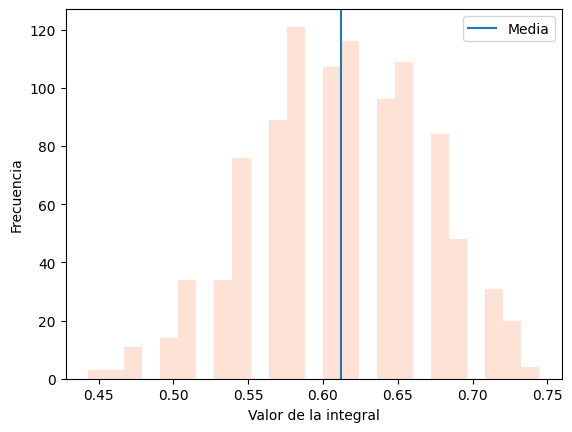

In [256]:
#Simulacion
#Parametros
m=1000                          #Número de iteraciones
n=50                            #Tamaño de la experimentos
a=0                             #Límite inferior de la integral
b=1                             #Límite superior de la integral
c=np.sqrt(np.arctan(1))         #Cota superior g(x)<c
aprox2=[]
x_inside=[]
y_inside=[]
x_outside=[]
y_outside=[]
for i in range(m):             #Simulación de m experimentos
  [I2,inside,outside,prob] = exp_met_ar(n,a,b,c)
  aprox2.append(I2)
histograma1(aprox2)

In [257]:
mu2 = np.mean(aprox2) # Calculamos la media
print(f"Valor de la media: {mu2:.4f}")
sigma2 = np.var(aprox2) # Calculamos la varianza
print(f"Valor de la varianza: {sigma2:.4f}")

Valor de la media: 0.6119
Valor de la varianza: 0.0032


In [258]:
end_time2 = time.time()
tiempo2 = end_time2 - start_time2 # Calculamos el tiempo de ejecución
print(f"Tiempo de ejecución: {tiempo2:.4f} segundos")

Tiempo de ejecución: 8.2658 segundos


# MUESTREO DE IMPORTANCIA

Este método es una mejora del método de media muestral cuando la función que queremos integrar tiene un comportamiento irregular (es decir, tiene picos o áreas donde varía mucho), o cuando la función es difícil de muestrear directamente.

El objetivo es reducir la varianza de la estimación concentrando más muestras en las áreas donde la función tiene más importancia. Para ello, se elige una función de densidad de probabilidad $g(x)$, que se asemeje a la forma de $f(x)$ y que sea más fácil de integrar o muestrear.

La integral se reescribe como:

$$
I = \int_a^b f(x) \, dx = \int_a^b \frac{f(x)}{g(x)} g(x) \, dx
$$

El procedimiento es:

 1. Seleccionamos una función de densidad $g(x)$ que sea fácil de muestrear y que esté bien adaptada a la forma de $f(x)$.

 2. Generamos muestras $ x_1, x_2, ... , x_N $ a partir de la distribución $ g(x) $.

 3. Calculamos la media ponderada de la función evaluada en esas muestras:
$$ I \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{g(x_i)}$$

Este método es particularmente útil cuando $f(x)$ tiene picos o áreas de alto valor en algunas regiones específicas, ya que permite concentrar más muestras en esas zonas importantes.


Veamos que
$$
cos(\frac{\pi}{2}x) ≈ 1-x^2
$$
Podemos utilizar esta función para aplicar el método de muestreo de importancia. Para lo cual debemos primero definir si es una función de densidad.

La posible $g(x)$ sera $g(x)=1-x^2$
Verificarquemos que sea una funciòn de probabilidad:
* $ g(x) \geq 0$
     
     Se cumple que $1-x^2$ en el intervalo $[0,1]$.

* La integral del intervalo sea igual a 1

-> $$\int_{0}^{1} (1-x^2)dx = \frac{2}{3}$$

 si multiplicamos por $\frac{3}{2} $ a $g(x)$ ya puede ser una funciòn de probabilidad.
 por lo que $$g(x) = \frac{3}{2} (1-x^2) $$ en $[0,1]$

-> Calculamos la acomulativa

 $$g(x) = \int_{0}^{x} g(z) dz = \frac{3}{2}x - \frac{x^3}{2}$$

Ahora, utilizamos el método de aceptación y rechazo inversa para generar la muestra.

In [259]:
start_time3 = time.time()# Definimos nuestra variable que almacenara el tiempo de ejecución
def f(x):
  return (3/2)*(1-x**2) # Definimos nuestra f(x)

In [260]:
def g(x):   #definimos nuestra g(x)
    return 1  # Uniforme en [0, 1]

In [261]:
def met_aceptacion(n):
  x = 0
  C = (3/2)
  Lista = []
  for i in range(n):
    #Generamos una uniforme
    u = rnd.random() #Genera números aleatorios entre 0 y 1
    y = rnd.random() #Generar la variable y con la distribución de g.
    if (u <= f(y)/(C*g(y))):
      x = y
    Lista.append(x)  #Agregamos los elementos a una lista
  return Lista

In [262]:
G = met_aceptacion(100000)

(array([744., 775., 755., 769., 720., 711., 803., 764., 724., 767., 747.,
        799., 777., 783., 732., 790., 714., 722., 699., 733., 723., 633.,
        702., 680., 746., 774., 740., 749., 739., 685., 712., 706., 761.,
        722., 746., 768., 797., 696., 727., 697., 652., 670., 690., 708.,
        653., 734., 776., 689., 726., 720., 694., 767., 728., 717., 684.,
        774., 690., 651., 707., 696., 665., 661., 625., 663., 638., 737.,
        701., 656., 673., 680., 722., 688., 599., 679., 629., 622., 658.,
        613., 647., 643., 690., 648., 639., 615., 601., 599., 660., 593.,
        584., 539., 494., 621., 542., 629., 612., 532., 536., 553., 595.,
        531., 510., 574., 520., 588., 538., 529., 543., 580., 489., 508.,
        491., 488., 537., 496., 503., 512., 530., 510., 504., 500., 458.,
        461., 495., 495., 491., 448., 466., 432., 428., 462., 445., 395.,
        353., 402., 418., 422., 422., 379., 409., 403., 388., 369., 399.,
        364., 386., 383., 369., 349., 

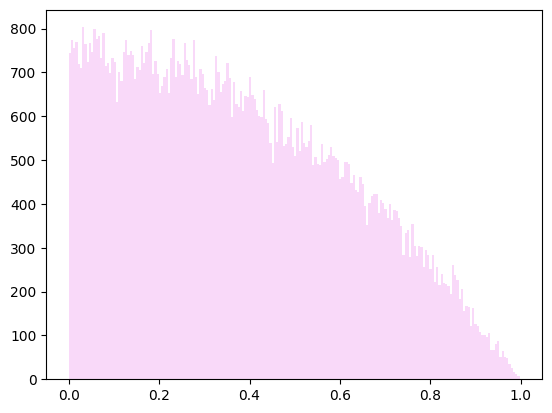

In [263]:
plt.hist(G,bins = 200, color = "violet", alpha=0.3)

In [264]:
def g3(x):
  return np.cos((np.pi*x)/2)

In [265]:
def expm(n,a,b):
  I3 = 0
  G = met_aceptacion(n)
  for i in range(n):
     I3 +=  (1/n) * (g3(G[i])/f(G[i]))
  return I3

Estimación de la Media: 0.6369


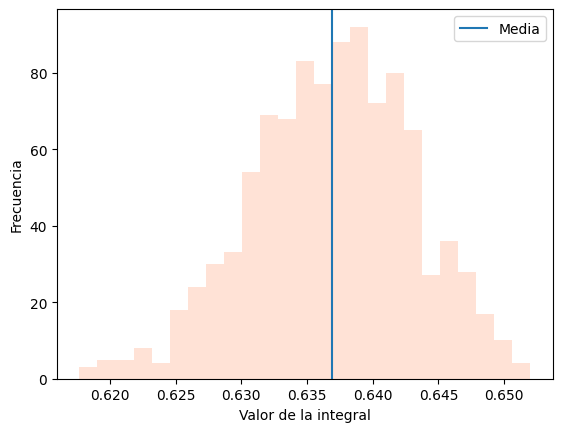

In [266]:
#Parametros
m=1000        #Número de iteraciones
n=50           #Tamaño de la experimentos
a=0             #Límite inferior de la integral
b=1             #Límite superior de la integral
aprox3=[]
s = []
for i in range(m):
  I3 = expm(n,a,b)
  aprox3.append(I3)
histograma1(aprox3)

In [267]:
mu3 = np.mean(aprox3) # Calculamos la media
print(f"Valor de la media: {mu3:.4f}")
sigma3 = np.var(aprox3) # Calculamos la varianza
print(f"Valor de la varianza: {sigma3:.4f}")

Valor de la media: 0.6369
Valor de la varianza: 0.0000


In [268]:
end_time3 = time.time()
tiempo3 = end_time3 - start_time3 # Calculamos el tiempo de ejecución
print(f"Tiempo de ejecución: {tiempo3:.4f} segundos")

Tiempo de ejecución: 14.0523 segundos


* Media Muestral: Aproxima la integral tomando el promedio de los valores de la función en muestras aleatorias distribuidas uniformemente.
* Acierto y Error: Calcula la proporción de puntos generados aleatoriamente que caen debajo de la curva.
* Muestreo de Importancia: Ajusta el proceso de muestreo utilizando una distribución que sea más representativa de la función para reducir la varianza.

Cada método tiene sus ventajas dependiendo de la naturaleza de la función y el dominio de integración, pero acontinuación compararemos cada uno de ellos para determinar su eficiencia.

# TABLA COMPARATIVA

Suponga dos métodos de Monte Carlo para estimar
$$ I= \int_a^b g(x) \, dx $$

* Sean $\theta_1$ y $\theta_2$ las estimaciones producidas
$$ E(\theta_1) = E(\theta_2) = I$$

* Sean $t_1$ y $t_2$ los tiempos de computo requeridos para evaluar $\theta_1$ y $\theta_2$ respectivamente, diremos que el primer método es mas eficiente que el segundo si:
$$ \epsilon = \frac{t_1 (var (\theta_1))}{t_2 (var (\theta_2))} < 1$$

In [269]:
# Tabla de tiempos y varianzas de cada método

from tabulate import tabulate # Importamos libreria para nuestra tabla

resultados = [
    [ 'Media muestral', f'{tiempo1:.4f}', f'{sigma1:.4f}'],
    [ 'Acierto y error', f'{tiempo2:.4f}', f'{sigma2:.4f}'],
    [ 'Muestreo de importancia', f'{tiempo3:.4f}', f'{sigma3:.4f}']
]

# Encabezados
headers = ['Método', 'Tiempo', 'Varianza']

# Crear la tabla
tabla = tabulate(resultados, headers, tablefmt='grid')

# Mostrar la tabla
print(tabla)


+-------------------------+----------+------------+
| Método                  |   Tiempo |   Varianza |
+=========================+==========+============+
| Media muestral          |   7.5508 |     0.0019 |
+-------------------------+----------+------------+
| Acierto y error         |   8.2658 |     0.0032 |
+-------------------------+----------+------------+
| Muestreo de importancia |  14.0523 |     0      |
+-------------------------+----------+------------+


# TABLA FINAL

Compararemos el valor de epsilon para cada método, donde el tamaño de la muestra en todos los métodos es la misma (1000) y asi determinar su eficiencia.

In [272]:
from tabulate import tabulate

epsilon1= (tiempo1*sigma1)/(tiempo2*sigma2) # Media muestral vs acierto y error
epsilon2= (tiempo1*sigma1)/(tiempo3*sigma3) # Media muestral vs muestreo de importancia
epsilon3= (tiempo2*sigma2)/(tiempo1*sigma1) # Acierto y error vs media muestral
epsilon4= (tiempo2*sigma2)/(tiempo3*sigma3) # Acierto y error vs muestreo de importancia
epsilon5= (tiempo3*sigma3)/(tiempo1*sigma1) # Muestreo de importancia vs media muestral
epsilon6= (tiempo3*sigma3)/(tiempo2*sigma2) # Muestreo de importancia vs acierto y error

# Crear lista de comparaciones
comparaciones = [
    ['Media muestral', ' - ', f'{epsilon1:.4f}', f'{epsilon2:.4f}'],
    ['Acierto y error', f'{epsilon3:.4f}', ' - ', f'{epsilon4:.4f}'],
    ['Muestreo de importancia', f'{epsilon5:.4f}', f'{epsilon6:.4f}', ' - ']
]

# Encabezados
headers = ['vs', 'Media muestral', 'Acierto y error', 'Muestreo de importancia']

# Crear la tabla
tabla1 = tabulate(comparaciones, headers, tablefmt='grid')

# Mostrar la tabla
print(tabla1)

# Evaluar eficiencia bajo condiciones dadas
eficiencia = []

# Caso 1
if epsilon1 < 1:
    eficiencia.append("Caso 1: Media muestral es más eficiente que Acierto y error.")
else:
    eficiencia.append("Caso 1: No se puede asegurar que Media muestral sea más eficiente que Acierto y error, posiblemente Acierto y error es mas eficiente.")

# Caso 2
if epsilon2 < 1:
    eficiencia.append("Caso 2: Media muestral es más eficiente que Muestreo de importancia.")
else:
    eficiencia.append("Caso 2: No se puede asegurar que Media muestral sea más eficiente que Muestreo de importancia, posiblemente Muestreo de importancia es mas eficiente.")

# Caso 3
if epsilon3 < 1:
    eficiencia.append("Caso 3: Acierto y error es más eficiente que Media muestral.")
else:
    eficiencia.append("Caso 3: No se puede asegurar que Acierto y error sea más eficiente que Media muestral, posiblemente Media muestral es mas eficiente.")

# Caso 4
if epsilon4 < 1:
    eficiencia.append("Caso 4: Acierto y error es más eficiente que Muestreo de importancia.")
else:
    eficiencia.append("Caso 4: No se puede asegurar que Acierto y error sea más eficiente que Muestreo de importancia, posiblemente Muestreo de importancia es mas eficiente.")

# Caso 5
if epsilon5 < 1:
    eficiencia.append("Caso 5: Muestreo de importancia es más eficiente que Media muestral.")
else:
    eficiencia.append("Caso 5: No se puede asegurar que Muestreo de importancia sea más eficiente que Media muestral, posiblemente Media muestral es mas eficiente.")

# Caso 6
if epsilon6 < 1:
    eficiencia.append("Caso 6: Muestreo de importancia es más eficiente que Acierto y error.")
else:
    eficiencia.append("Caso 6: No se puede asegurar que Muestreo de importancia sea más eficiente que Acierto y error, posiblemente Media muestral es mas eficiente.")


# Mostrar resultados de eficiencia
print("\nResultados de eficiencia:")
for resultado in eficiencia:
    print(resultado)


+-------------------------+------------------+-------------------+---------------------------+
| vs                      | Media muestral   | Acierto y error   | Muestreo de importancia   |
+=========================+==================+===================+===========================+
| Media muestral          | -                | 0.5577            | 27.5303                   |
+-------------------------+------------------+-------------------+---------------------------+
| Acierto y error         | 1.7931           | -                 | 49.3660                   |
+-------------------------+------------------+-------------------+---------------------------+
| Muestreo de importancia | 0.0363           | 0.0203            | -                         |
+-------------------------+------------------+-------------------+---------------------------+

Resultados de eficiencia:
Caso 1: Media muestral es más eficiente que Acierto y error.
Caso 2: No se puede asegurar que Media muestral sea más e

Por lo que podemos concluir que en este el mejor método es "Muestreo de importancia".

